In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('Boston.csv')


In [3]:
df.head()

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [5]:
y

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: medv, Length: 506, dtype: float64

In [6]:
#train test split 
from sklearn.model_selection import train_test_split


In [7]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [8]:
X_train

,Unnamed: 0,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat
81,82,0.04462,25.0,4.86,0,0.426,6.619,70.4,5.4007,4,281,19.0,395.63,7.22
360,361,4.54192,0.0,18.10,0,0.770,6.398,88.0,2.5182,24,666,20.2,374.56,7.79
394,395,13.35980,0.0,18.10,0,0.693,5.887,94.7,1.7821,24,666,20.2,396.90,16.35
194,195,0.01439,60.0,2.93,0,0.401,6.604,18.8,6.2196,1,265,15.6,376.70,4.38
477,478,15.02340,0.0,18.10,0,0.614,5.304,97.3,2.1007,24,666,20.2,349.48,24.91
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323,324,0.28392,0.0,7.38,0,0.493,5.708,74.3,4.7211,5,287,19.6,391.13,11.74
192,193,0.08664,45.0,3.44,0,0.437,7.178,26.3,6.4798,5,398,15.2,390.49,2.87
117,118,0.15098,0.0,10.01,0,0.547,6.021,82.6,2.7474,6,432,17.8,394.51,10.30
47,48,0.22927,0.0,6.91,0,0.448,6.030,85.5,5.6894,3,233,17.9,392.74,18.80


In [9]:
 from sklearn.preprocessing import StandardScaler

In [10]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)

In [11]:
X_test = scaler.transform(X_test)

In [12]:
#scaler.inverse_transform(X_train)

In [13]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score 

In [14]:
regression = LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [15]:
mse = cross_val_score(regression,X_train,y_train,scoring = 'neg_mean_squared_error',cv= 5)

In [16]:
np.mean(mse)

-23.09831585392517

In [17]:
reg_pred = regression.predict(X_test)

In [18]:
reg_pred

array([25.0607223 , 24.05256318, 29.26102423, 12.05747454, 21.18142009,
       19.14369466, 20.75857906, 21.1396352 , 19.33177416, 20.48053741,
        5.71628894, 16.96852272, 17.07061723,  5.33990312, 40.26611157,
       32.47752316, 22.58231417, 36.69919761, 31.29999176, 23.27069831,
       24.70938847, 24.59385461, 20.57638582, 30.66168265, 22.33958598,
       10.94938544, 17.1922416 , 18.28569772, 35.49665998, 20.67849571,
       18.21822919, 17.71041387, 19.05244026, 23.54064215, 29.11162002,
       19.56515292, 10.86340032, 25.22692941, 18.19876536, 15.39414232,
       26.21212742, 20.67641356, 22.20274567, 15.57558144, 22.49254739,
       24.72531798, 19.44790651, 22.97126922,  9.52133197, 24.26368412,
       21.57344384, 17.56923361, 24.46164355, 29.5009585 , 13.34206063,
       21.41427037, 20.4987643 , 14.69421962, 15.00861666, 21.83895011,
       16.94867766, 21.41030929, 33.13982974, 31.68127061, 17.93768888,
       33.15804768, 18.5620212 , 18.68387481, 19.37583516, 23.10

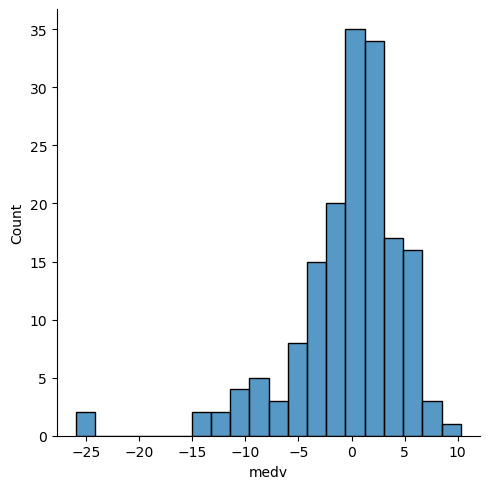

In [19]:
import seaborn as sns
sns.displot(reg_pred - y_test)

In [20]:
from sklearn.metrics import r2_score

In [21]:
score = r2_score(reg_pred,y_test)

In [22]:
score 

0.5559999264339235